<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Определение-границ-классов" data-toc-modified-id="Определение-границ-классов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Определение границ классов</a></span></li><li><span><a href="#Определение-оптимального-числа-соседей" data-toc-modified-id="Определение-оптимального-числа-соседей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение оптимального числа соседей</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris.frame['sepal length (cm)'][0:50]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length (cm), dtype: float64

In [5]:
iris.frame[50:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [98]:
iris.frame[100:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [6]:
class_feature_means = pd.DataFrame()
for c, rows in iris.frame.groupby('target'):
    #print(rows)
    #print(c)
    class_feature_means[c] = rows.mean()
class_feature_means

,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026
target,0.000,1.000,2.000


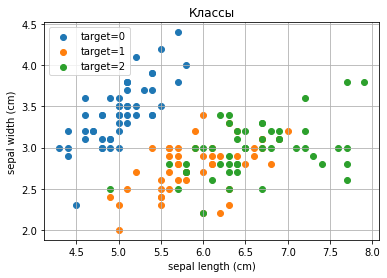

In [7]:
axes = plt.axes()
legend = []
plt.title('Классы')
x_lable='sepal length (cm)'
y_lable='sepal width (cm)'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris.frame.groupby('target'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("target=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

In [13]:
####################
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [14]:
iris = load_iris(as_frame=True)
iris_fr=iris.frame

In [15]:
iris_copy=iris_fr
iris_copy.pop('target')
iris_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
np_iris=iris_copy.to_numpy()

In [18]:
features  = np_iris

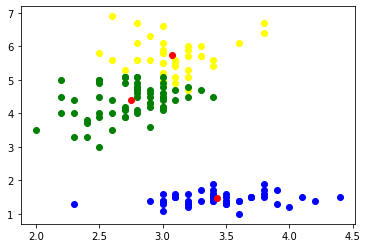

In [49]:
codebook, distortion = kmeans(features, 3)
# Plot whitened data and cluster centers in red
for i in range(len(features)):
    if rez[0][i]==0:
        col='yellow'
    if rez[0][i]==1:
        col='green'
    if rez[0][i]==2:
        col='blue'
    plt.scatter(features[i, 1], features[i, 2],c=col)
plt.scatter(codebook[:, 1], codebook[:, 2], c='r')
plt.show()

In [24]:
distortion, codebook

(0.6469284261792044,
 array([[6.8275    , 3.07      , 5.7       , 2.0625    ],
        [5.885     , 2.74      , 4.37666667, 1.41833333],
        [5.006     , 3.428     , 1.462     , 0.246     ]]))

In [28]:
rez=vq(features,codebook)
s0=pd.Series(data=rez)
num0=(s0[0]<1).sum()
num1=((s0[0]<2)&(s0[0]>0)).sum()
num2=(s0[0]==2).sum()
(num0,num1,num2)

(39, 61, 50)

In [40]:
rez[0][149]
#len(features)

1

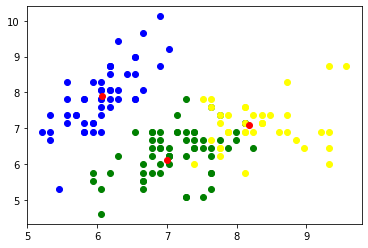

In [46]:
whitened = whiten(features)
codebook, distortion = kmeans(whitened, 3)
# Plot whitened data and cluster centers in red
for i in range(len(features)):
    if rez[0][i]==0:
        col='yellow'
    if rez[0][i]==1:
        col='green'
    if rez[0][i]==2:
        col='blue'
    plt.scatter(whitened[i, 0], whitened[i, 1],c=col)
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

In [ ]:
axes = plt.axes()
axes.set_xlim([4, 8])         
axes.set_ylim([0, 8])          
legend = []
plt.title('Линейная регрессия - Ирисы Фишера')
x_lable='sepal_length'
y_lable='petal_length'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris_set.groupby('species'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("species=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

In [158]:
rez=vq(whitened,codebook)
s0=pd.Series(data=rez)
s0[0]
num0=(s0[0]<1).sum()
num1=((s0[0]<2)&(s0[0]>0)).sum()
num2=(s0[0]>1).sum()
(num0,num1,num2)

(53, 50, 47)

In [159]:
rez

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]),
 array([0.21295824, 0.99604549, 0.65198444, 0.9034561 , 0.40215457,
        1.21154793, 0.50244932, 0.09132468, 1.42174651, 0.78993078,
        0.78999385, 0.27618123, 1.03497888, 1.33482453, 1.63865558,
        2.39898792, 1.20748818, 0.21618828, 1.20986655, 0.86706182,
        0.50401564, 0.66826437, 0.68658071, 0.47945627, 0.36345425,
        0.99023912, 0.22683089, 0.2947186 , 0.25361098, 0.65019824,
        0.80138328, 0.52309257, 1.57658655, 1.87652483, 0.76858489,
        0.548963

In [ ]:
#############THE END

In [68]:
#############30.11.2023
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
features  = np.array([[ 1.9,2.3],
                      [ 1.5,2.5],
                      [ 0.8,0.6],
                      [ 0.4,1.8],
                      [ 0.1,0.1],
                      [ 0.2,1.8],
                      [ 2.0,0.5],
                      [ 0.3,1.5],
                      [ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)

(array([[2.45121811, 3.03653641],
        [0.98872663, 1.31944737]]),
 0.9088234961964715)

In [69]:
codes = 3
kmeans(whitened,codes)

(array([[0.4325679 , 2.15087996],
        [2.45121811, 3.03653641],
        [1.40584568, 0.69587293]]),
 0.5511808116483707)

In [70]:
#print(whitened)

[[2.73959671 2.91001406]
 [2.16283951 3.16305876]
 [1.15351441 0.7591341 ]
 [0.5767572  2.27740231]
 [0.1441893  0.12652235]
 [0.2883786  2.27740231]
 [2.88378601 0.63261175]
 [0.4325679  1.89783526]
 [1.44189301 1.2652235 ]]


In [71]:
print(codes)
#######

3


In [ ]:
##################
################
##################

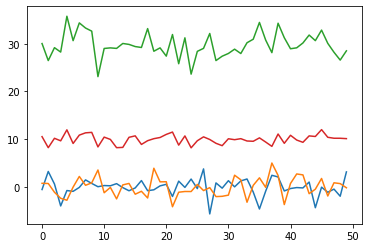

100


In [80]:
# Create 50 datapoints in two clusters a and b
pts = 50
rng = np.random.default_rng()
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
plt.plot(a)
plt.plot(b)
plt.show()
features = np.concatenate((a, b))
print(len(features))

In [85]:
#print(features)
print(len(features))

100


In [86]:
whitened = whiten(features)
len(whitened)

100

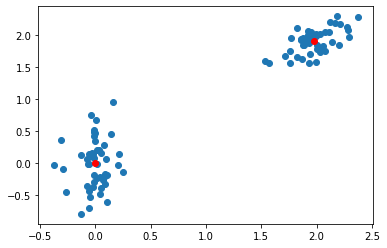

In [89]:

# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

In [90]:
codebook

array([[ 1.97302986,  1.90725796],
       [-0.00494859, -0.00338541]])

In [88]:
distortion

0.28537926256387247

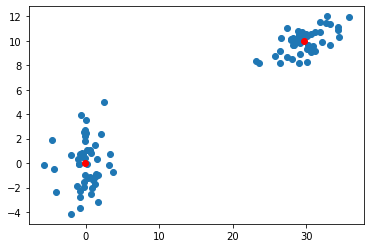

In [94]:
codebook, distortion = kmeans(features, 2)
# Plot whitened data and cluster centers in red
plt.scatter(features[:, 0], features[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

In [ ]:
####################

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
#X = iris.data[['sepal length (cm)','sepal width (cm),petal length (cm), petal width (cm) ']]
X = iris.data[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris.target
print(X)
print("__________")
print(y)
target_names = iris.target_names
X_knn = knn_model.fit(X, y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
__________
0      0
1      0
2      0
3 

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = X_knn.predict(X) #Определим метки классов для тестовых данных
accuracy_score(y, predictions) #Оценим точность определения меток

0.96

In [54]:
confusion_matrix(y, predictions)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

# Определение границ классов

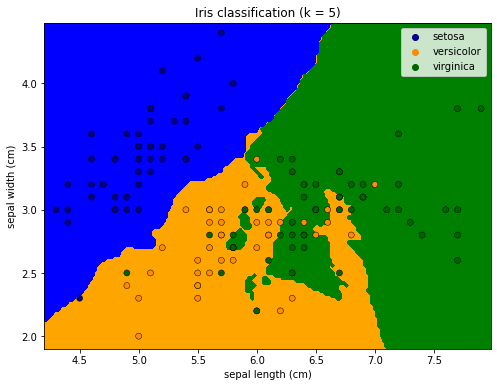

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ['darkblue', 'darkorange', 'darkgreen']

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris classification (k = %i)" % (n_neighbors))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

# Определение оптимального числа соседей

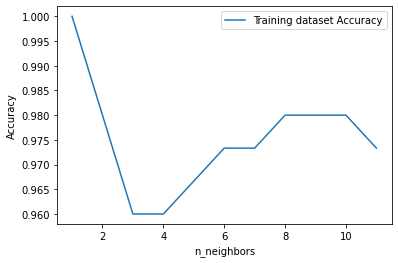

In [56]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
  
Data = load_iris()
  
# Create feature and target arrays
X = Data.data
y = Data.target
  
neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X, y)
      
# Generate plot
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [57]:
# метод к-средних

In [58]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

In [59]:
# Загружаем набор данных
iris_df = datasets.load_iris()

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(iris_df.data)

# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [60]:
target=iris['target']
len(target)
len(all_predictions)
for i in range(len(target)):
   print(' i:',i,'  ', target[i] ,'  ',all_predictions[i])

 i: 0    0    0
 i: 1    0    0
 i: 2    0    0
 i: 3    0    0
 i: 4    0    0
 i: 5    0    0
 i: 6    0    0
 i: 7    0    0
 i: 8    0    0
 i: 9    0    0
 i: 10    0    0
 i: 11    0    0
 i: 12    0    0
 i: 13    0    0
 i: 14    0    0
 i: 15    0    0
 i: 16    0    0
 i: 17    0    0
 i: 18    0    0
 i: 19    0    0
 i: 20    0    0
 i: 21    0    0
 i: 22    0    0
 i: 23    0    0
 i: 24    0    0
 i: 25    0    0
 i: 26    0    0
 i: 27    0    0
 i: 28    0    0
 i: 29    0    0
 i: 30    0    0
 i: 31    0    0
 i: 32    0    0
 i: 33    0    0
 i: 34    0    0
 i: 35    0    0
 i: 36    0    0
 i: 37    0    0
 i: 38    0    0
 i: 39    0    0
 i: 40    0    0
 i: 41    0    0
 i: 42    0    0
 i: 43    0    0
 i: 44    0    0
 i: 45    0    0
 i: 46    0    0
 i: 47    0    0
 i: 48    0    0
 i: 49    0    0
 i: 50    1    1
 i: 51    1    1
 i: 52    1    2
 i: 53    1    1
 i: 54    1    1
 i: 55    1    1
 i: 56    1    1
 i: 57    1    1
 i: 58    1    1
 i: 59 

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = model.predict(iris_df.data) #Определим метки классов для тестовых данных
accuracy_score(y, predictions) #Оценим точность определения меток

0.8933333333333333

In [62]:
confusion_matrix(y, predictions)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)